In [14]:
import CAJAL.lib.visualization as vis
from CAJAL.lib import run_gw
import pandas as pd

In [25]:
# Read in GW distance matrix
gw_mat = run_gw.read_gw_mat("../CAJAL/data/gw_results/example_geodesic_gw_dist_mat.txt")

In [26]:
# Create 2-dimensional UMAP embedding to visualize the morphology space
umap_emb = vis.get_umap(gw_mat)

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


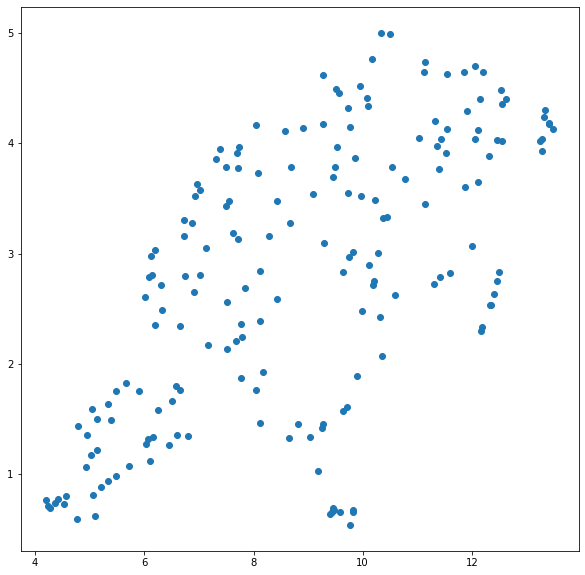

In [27]:
# Scatter plot of UMAP embedding (each point is a cell)
vis.plot_umap(umap_emb)

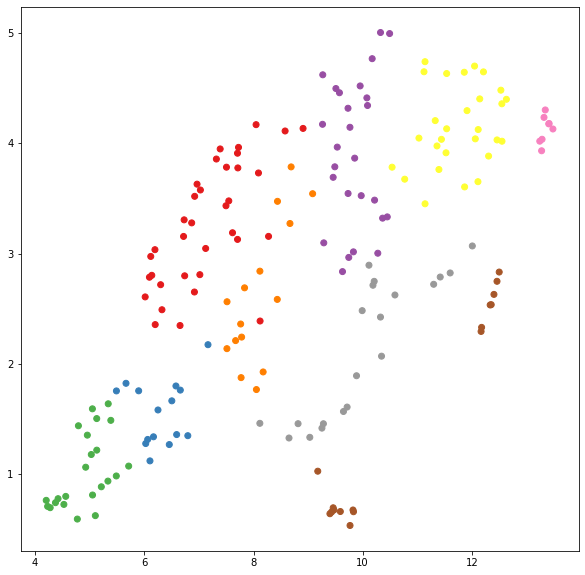

In [28]:
# Louvain clustering of morphology space (cells in the same cluster have more similar morphologies)
louvain_clus = vis.louvain_clustering(gw_mat, nn=5)
vis.plot_umap(umap_emb, c = louvain_clus, cmap="Set1")

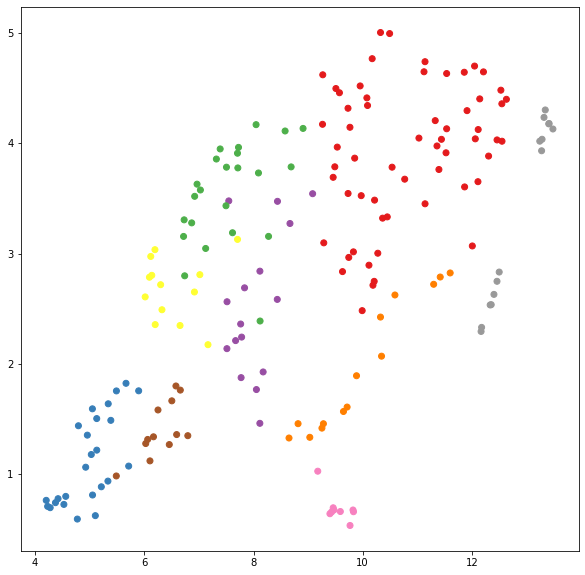

In [29]:
# Leiden clustering of morphology space (cells in the same cluster have more similar morphologies)
leiden_clus = vis.leiden_clustering(gw_mat, nn=5)
vis.plot_umap(umap_emb, c = leiden_clus, cmap="Set1")

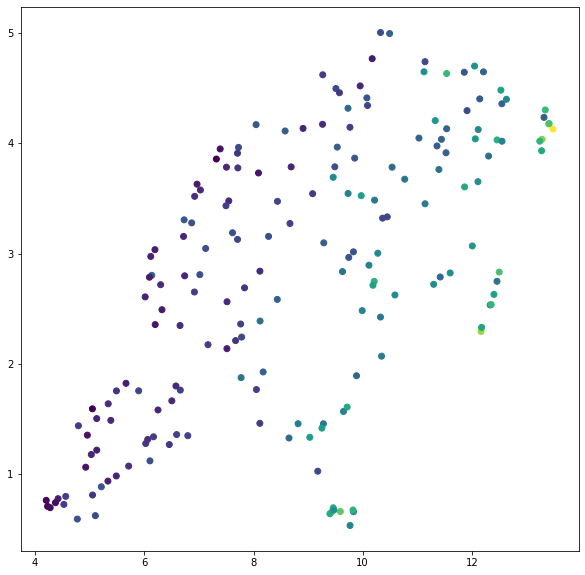

In [39]:
# Plot morphological features to better understand the morphological space
# Features computed separately using ImageJ's SNT, but could be any descriptor
morph_features = pd.read_csv("../CAJAL/data/a10_full_SNT_measurements.csv")
vis.plot_umap(umap_emb, c=morph_features.loc[:,"No. of branches"])